# WellProductionDecline_Project

In [1]:
#Import Some Useful Packages
import pandas as pd
#import pandas_profiling as pp
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, brier_score_loss
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
#pip install pandas-profiling
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#import missingno as msno


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import sys
!{sys.executable} -m pip install pandas-profiling

## Load Dataset

In [3]:
df = pd.read_csv("Projectinput.csv")

In [4]:
df.describe()

,S/N,NUMBER,API,Cumulative Production (Oil) (Bbls) (Current),Cumm Gas (Present),Cumulative Production (Oil) (Bbls) (3 Years),Cumulative Production Gas (3 Years),Cumulative Production (Water) (Bbls) (3 Years),No of days produced in 3 years,Depth,Elevation,Elevation.1,Months of production,Avg of first year,Average Production at 24,Average Production at 36,3 years production decline
count,61.000000,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,32.065574,19393.901639,3.304980e+09,5.307936e+05,4.823058e+05,3.401511e+05,2.415912e+05,68487.868852,974.754098,17826.672131,2298.311475,2274.655738,121.360656,14105.192037,7149.573770,4894.590164,67.473770
std,19.145817,3588.440760,2.409868e+06,4.112548e+05,4.227991e+05,2.625641e+05,1.999714e+05,73296.798706,75.409472,3007.469588,188.942984,189.409247,30.890685,10024.995359,6483.445993,4614.706818,14.137844
min,1.000000,15928.000000,3.300702e+09,4.465800e+04,2.737400e+04,2.580500e+04,8.054000e+03,303.000000,721.000000,11325.000000,1912.000000,1887.000000,53.000000,1275.000000,203.000000,265.000000,20.600000
25%,16.000000,16991.000000,3.302501e+09,1.935640e+05,2.263580e+05,1.238140e+05,1.059190e+05,20106.000000,946.000000,14753.000000,2181.000000,2159.000000,96.000000,5602.000000,2058.000000,1356.000000,62.300000
50%,31.000000,17416.000000,3.306101e+09,3.864590e+05,4.690790e+05,2.050730e+05,2.204470e+05,29924.000000,1002.000000,19215.000000,2303.000000,2279.000000,136.000000,10825.000000,3720.000000,2902.000000,69.400000
75%,49.000000,21728.000000,3.306101e+09,8.463950e+05,5.969500e+05,5.645190e+05,3.200710e+05,107660.000000,1017.000000,20221.000000,2417.000000,2390.000000,142.000000,22495.500000,12530.000000,7210.000000,76.800000
max,65.000000,31306.000000,3.310503e+09,1.766002e+06,2.836874e+06,1.116211e+06,1.117271e+06,339073.000000,1087.000000,22970.000000,2791.000000,2765.000000,170.000000,41402.000000,24964.000000,21390.000000,95.800000


In [5]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)

In [6]:
prof.to_file("output.html")

In [7]:
df.head()

,S/N,NUMBER,Well Name,API,Field,County,Company,Cumulative Production (Oil) (Bbls) (Current),Cumm Gas (Present),Cumulative Production (Oil) (Bbls) (3 Years),...,No of days produced in 3 years,Depth,Elevation,Elevation.1,Start Date,Months of production,Avg of first year,Average Production at 24,Average Production at 36,3 years production decline
0,1,16164,PARSHALL 1-36H,3306100499,Parshall,Mountrail,EOG Resources,233265,126246,134320,...,1034,11325,1938,1913,6-May,166,6128.916667,2058,1375,77.6
1,2,16324,PARSHALL 2-36H,3306100503,Parshall,Mountrail,EOG Resources,386459,197807,204318,...,997,12111,2042,2016,6-Sep,162,8043.666667,4212,3126,61.1
2,3,16346,BARTELSON 1-3H,3306100504,Parshall,Mountrail,EOG Resources,549448,311788,317328,...,1026,14900,2054,2028,6-Nov,160,11405.083330,8397,4200,63.2
3,4,16370,WARBERG 1-25H,3306100507,Parshall,Mountrail,EOG Resources,456873,226358,274802,...,955,13289,2106,2080,7-Jan,158,10645.833330,6180,3137,70.5
4,5,24281,PARSHALL 32-0225H,3306102314,Parshall,Mountrail,EOG Resources,710829,500570,536028,...,956,19574,2005,1978,13-Mar,84,27575.333330,8272,6179,77.6


In [8]:
df.head(10)

,S/N,NUMBER,Well Name,API,Field,County,Company,Cumulative Production (Oil) (Bbls) (Current),Cumm Gas (Present),Cumulative Production (Oil) (Bbls) (3 Years),...,No of days produced in 3 years,Depth,Elevation,Elevation.1,Start Date,Months of production,Avg of first year,Average Production at 24,Average Production at 36,3 years production decline
0,1,16164,PARSHALL 1-36H,3306100499,Parshall,Mountrail,EOG Resources,233265,126246,134320,...,1034,11325,1938,1913,6-May,166,6128.916667,2058,1375,77.6
1,2,16324,PARSHALL 2-36H,3306100503,Parshall,Mountrail,EOG Resources,386459,197807,204318,...,997,12111,2042,2016,6-Sep,162,8043.666667,4212,3126,61.1
2,3,16346,BARTELSON 1-3H,3306100504,Parshall,Mountrail,EOG Resources,549448,311788,317328,...,1026,14900,2054,2028,6-Nov,160,11405.083330,8397,4200,63.2
3,4,16370,WARBERG 1-25H,3306100507,Parshall,Mountrail,EOG Resources,456873,226358,274802,...,955,13289,2106,2080,7-Jan,158,10645.833330,6180,3137,70.5
4,5,24281,PARSHALL 32-0225H,3306102314,Parshall,Mountrail,EOG Resources,710829,500570,536028,...,956,19574,2005,1978,13-Mar,84,27575.333330,8272,6179,77.6
5,6,16483,ZACHER 1-24H,3306100516,Parshall,Mountrail,EOG Resources,624745,341686,342903,...,1054,14400,2167,2146,7-Jun,153,14145.916670,7080,4588,67.6
6,7,16497,HOFF 1-10H,3306100520,Parshall,Mountrail,EOG Resources,487622,251183,283438,...,891,14328,1999,1978,7-Jun,153,14432.416670,5739,2809,80.5
7,8,25253,PARSHALL 35-0509H,3306102488,Parshall,Mountrail,EOG Resources,539028,600698,396910,...,808,21587,2113,2088,13-Oct,77,15893.166670,10212,5469,65.6
8,9,16550,RALPH 1-32H,3306100524,Parshall,Mountrail,EOG Resources,455154,144607,252355,...,922,14100,2027,2007,7-Sep,151,12267.833330,5245,4381,64.3
9,10,17912,SORENSON 11-3H,3306100963,Sanish,Mountrail,Whiting Oil and Gas Corporation,873459,655160,586996,...,1014,20221,2143,2116,10-Feb,121,25651.666670,13956,9620,62.5


In [9]:
df.shape

(61, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   S/N                                             61 non-null     int64  
 1   NUMBER                                          61 non-null     int64  
 2   Well Name                                       61 non-null     object 
 3   API                                             61 non-null     int64  
 4   Field                                           61 non-null     object 
 5   County                                          61 non-null     object 
 6   Company                                         61 non-null     object 
 7   Cumulative Production (Oil) (Bbls) (Current)    61 non-null     int64  
 8   Cumm Gas (Present)                              61 non-null     int64  
 9   Cumulative Production (Oil) (Bbls) (3 Years) 

In [11]:
df.head(10)

,S/N,NUMBER,Well Name,API,Field,County,Company,Cumulative Production (Oil) (Bbls) (Current),Cumm Gas (Present),Cumulative Production (Oil) (Bbls) (3 Years),...,No of days produced in 3 years,Depth,Elevation,Elevation.1,Start Date,Months of production,Avg of first year,Average Production at 24,Average Production at 36,3 years production decline
0,1,16164,PARSHALL 1-36H,3306100499,Parshall,Mountrail,EOG Resources,233265,126246,134320,...,1034,11325,1938,1913,6-May,166,6128.916667,2058,1375,77.6
1,2,16324,PARSHALL 2-36H,3306100503,Parshall,Mountrail,EOG Resources,386459,197807,204318,...,997,12111,2042,2016,6-Sep,162,8043.666667,4212,3126,61.1
2,3,16346,BARTELSON 1-3H,3306100504,Parshall,Mountrail,EOG Resources,549448,311788,317328,...,1026,14900,2054,2028,6-Nov,160,11405.083330,8397,4200,63.2
3,4,16370,WARBERG 1-25H,3306100507,Parshall,Mountrail,EOG Resources,456873,226358,274802,...,955,13289,2106,2080,7-Jan,158,10645.833330,6180,3137,70.5
4,5,24281,PARSHALL 32-0225H,3306102314,Parshall,Mountrail,EOG Resources,710829,500570,536028,...,956,19574,2005,1978,13-Mar,84,27575.333330,8272,6179,77.6
5,6,16483,ZACHER 1-24H,3306100516,Parshall,Mountrail,EOG Resources,624745,341686,342903,...,1054,14400,2167,2146,7-Jun,153,14145.916670,7080,4588,67.6
6,7,16497,HOFF 1-10H,3306100520,Parshall,Mountrail,EOG Resources,487622,251183,283438,...,891,14328,1999,1978,7-Jun,153,14432.416670,5739,2809,80.5
7,8,25253,PARSHALL 35-0509H,3306102488,Parshall,Mountrail,EOG Resources,539028,600698,396910,...,808,21587,2113,2088,13-Oct,77,15893.166670,10212,5469,65.6
8,9,16550,RALPH 1-32H,3306100524,Parshall,Mountrail,EOG Resources,455154,144607,252355,...,922,14100,2027,2007,7-Sep,151,12267.833330,5245,4381,64.3
9,10,17912,SORENSON 11-3H,3306100963,Sanish,Mountrail,Whiting Oil and Gas Corporation,873459,655160,586996,...,1014,20221,2143,2116,10-Feb,121,25651.666670,13956,9620,62.5


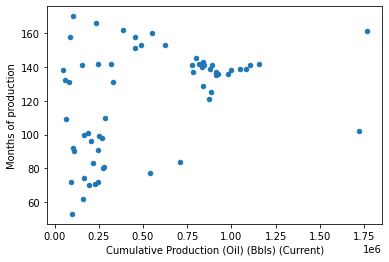

In [12]:
df.plot(kind="scatter", x="Cumulative Production (Oil) (Bbls) (Current)", y="Months of production")

In [13]:
corr_matrix = df.corr()

In [14]:
corr_matrix["3 years production decline"].sort_values(ascending=False)

3 years production decline                        1.000000
NUMBER                                            0.228966
S/N                                               0.151107
Cumulative Production (Water) (Bbls) (3 Years)    0.150564
Elevation                                        -0.057909
Elevation.1                                      -0.060389
Depth                                            -0.085792
Months of production                             -0.201125
Avg of first year                                -0.220381
API                                              -0.274270
No of days produced in 3 years                   -0.327253
Cumulative Production (Oil) (Bbls) (3 Years)     -0.388784
Cumulative Production Gas (3 Years)              -0.415961
Cumulative Production (Oil) (Bbls) (Current)     -0.471117
 Average Production at 24                        -0.487342
Cumm Gas (Present)                               -0.531108
Average Production at 36                         -0.6457

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD64A0E1C0>,
      dtype=object)

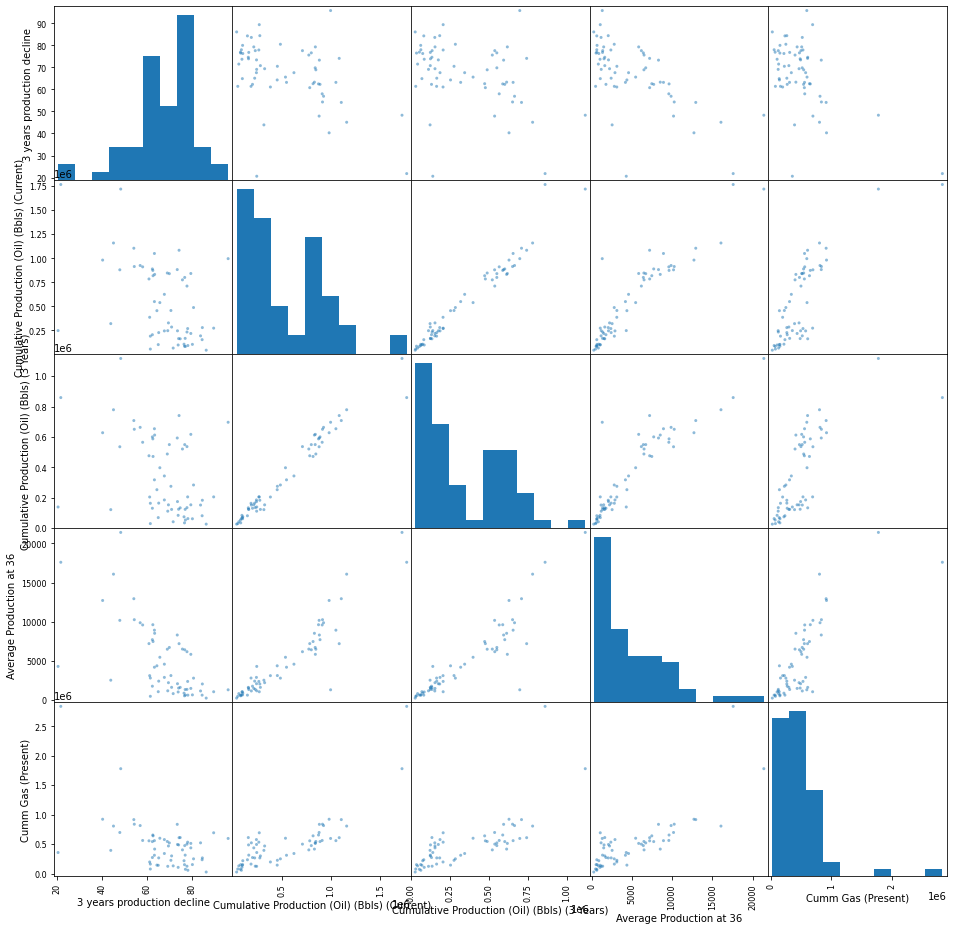

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["3 years production decline", "Cumulative Production (Oil) (Bbls) (Current)", "Cumulative Production (Oil) (Bbls) (3 Years)", "Average Production at 36",
"Cumm Gas (Present)"]
scatter_matrix(df[attributes], figsize=(16,16 ))

In [16]:
df1 = df.iloc[0:61, 0:24]

In [17]:
df1.head()

,S/N,NUMBER,Well Name,API,Field,County,Company,Cumulative Production (Oil) (Bbls) (Current),Cumm Gas (Present),Cumulative Production (Oil) (Bbls) (3 Years),...,No of days produced in 3 years,Depth,Elevation,Elevation.1,Start Date,Months of production,Avg of first year,Average Production at 24,Average Production at 36,3 years production decline
0,1,16164,PARSHALL 1-36H,3306100499,Parshall,Mountrail,EOG Resources,233265,126246,134320,...,1034,11325,1938,1913,6-May,166,6128.916667,2058,1375,77.6
1,2,16324,PARSHALL 2-36H,3306100503,Parshall,Mountrail,EOG Resources,386459,197807,204318,...,997,12111,2042,2016,6-Sep,162,8043.666667,4212,3126,61.1
2,3,16346,BARTELSON 1-3H,3306100504,Parshall,Mountrail,EOG Resources,549448,311788,317328,...,1026,14900,2054,2028,6-Nov,160,11405.083330,8397,4200,63.2
3,4,16370,WARBERG 1-25H,3306100507,Parshall,Mountrail,EOG Resources,456873,226358,274802,...,955,13289,2106,2080,7-Jan,158,10645.833330,6180,3137,70.5
4,5,24281,PARSHALL 32-0225H,3306102314,Parshall,Mountrail,EOG Resources,710829,500570,536028,...,956,19574,2005,1978,13-Mar,84,27575.333330,8272,6179,77.6


In [18]:
df1.shape

(61, 22)

In [19]:
X = df1.iloc[:, 7:21]
X.head()

,Cumulative Production (Oil) (Bbls) (Current),Cumm Gas (Present),Cumulative Production (Oil) (Bbls) (3 Years),Cumulative Production Gas (3 Years),Cumulative Production (Water) (Bbls) (3 Years),No of days produced in 3 years,Depth,Elevation,Elevation.1,Start Date,Months of production,Avg of first year,Average Production at 24,Average Production at 36
0,233265,126246,134320,50966,303,1034,11325,1938,1913,6-May,166,6128.916667,2058,1375
1,386459,197807,204318,75834,1674,997,12111,2042,2016,6-Sep,162,8043.666667,4212,3126
2,549448,311788,317328,122393,10637,1026,14900,2054,2028,6-Nov,160,11405.083330,8397,4200
3,456873,226358,274802,105919,2299,955,13289,2106,2080,7-Jan,158,10645.833330,6180,3137
4,710829,500570,536028,301565,63304,956,19574,2005,1978,13-Mar,84,27575.333330,8272,6179


In [20]:
X = X.drop(['Start Date'], axis=1)
X.head()

,Cumulative Production (Oil) (Bbls) (Current),Cumm Gas (Present),Cumulative Production (Oil) (Bbls) (3 Years),Cumulative Production Gas (3 Years),Cumulative Production (Water) (Bbls) (3 Years),No of days produced in 3 years,Depth,Elevation,Elevation.1,Months of production,Avg of first year,Average Production at 24,Average Production at 36
0,233265,126246,134320,50966,303,1034,11325,1938,1913,166,6128.916667,2058,1375
1,386459,197807,204318,75834,1674,997,12111,2042,2016,162,8043.666667,4212,3126
2,549448,311788,317328,122393,10637,1026,14900,2054,2028,160,11405.083330,8397,4200
3,456873,226358,274802,105919,2299,955,13289,2106,2080,158,10645.833330,6180,3137
4,710829,500570,536028,301565,63304,956,19574,2005,1978,84,27575.333330,8272,6179


In [21]:
X.shape

(61, 13)

In [22]:
y = df1.iloc[:, 21:22]

In [23]:
y.head()

,3 years production decline
0,77.6
1,61.1
2,63.2
3,70.5
4,77.6


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
X_train.shape

(48, 13)

In [26]:
X_test.shape

(13, 13)

In [27]:
y_train.shape

(48, 1)

In [28]:
y_test.shape

(13, 1)

In [29]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error
>>> y_pred = lin_reg.predict(X_test)
>>> lin_mse = mean_squared_error(y_test, y_pred)
>>> lin_rmse = np.sqrt(lin_mse)
>>> lin_rmse

6.070026160196459

In [32]:
y_pred

array([[78.0248978 ],
       [68.19829776],
       [79.10434495],
       [65.70696141],
       [55.90904801],
       [60.44059837],
       [71.68656565],
       [75.64071114],
       [83.3124027 ],
       [65.67137577],
       [77.34962668],
       [53.32673529],
       [25.32999256]])

In [33]:
y_test

,3 years production decline
26,75.6
35,76.3
60,86.1
28,68.9
11,60.8
2,63.2
34,73.4
59,61.4
40,84.4
22,62.3


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, brier_score_loss

In [35]:
print('The rmse of prediction for test data is: ', mean_squared_error(y_test, y_pred) ** 0.5)
print('The mae of prediction for test data is: ', mean_absolute_error(y_test, y_pred))
print('The r2_score of prediction for test data is: ', r2_score(y_test, y_pred))

The rmse of prediction for test data is:  6.070026160196459
The mae of prediction for test data is:  4.756338189610267
The r2_score of prediction for test data is:  0.8480749711380412


In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
y_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

9.904000745619456

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [11.72672162 15.57915274 24.96108972  5.62192138 14.39367917 20.48584877
 11.74836159  8.35440004  8.37555968  8.84562039]
Mean: 13.009235509522176
Standard deviation: 5.70568939373563


In [40]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 6.47251763  7.40204081 19.39533461  9.1483985  11.72189407 17.59129165
  6.01512572  8.21188124  3.11213123  7.03615535]
Mean: 9.610677081127372
Standard deviation: 4.925146384266381


# The decision tree regressor produces worse results than the linear regressor in this case.

In [41]:
from sklearn.ensemble import RandomForestRegressor
>>> forest_reg = RandomForestRegressor()
>>> forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [42]:
housing_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

9.904000745619456

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [44]:
display_scores(forest_rmse_scores)

Scores: [ 9.27503452  7.53761111 11.53469066  4.98169782 11.51384745 20.81737478
  8.27134999 10.99150052  7.03992349 12.04845083]
Mean: 10.401148117025826
Standard deviation: 4.107982559930136


# Random tree regressor better than the decision tree regressor but not as good as the linear regressor.

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [47]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [48]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

13.958759274872072 {'max_features': 2, 'n_estimators': 3}
12.514544258581694 {'max_features': 2, 'n_estimators': 10}
12.493213113576285 {'max_features': 2, 'n_estimators': 30}
12.817720083858445 {'max_features': 4, 'n_estimators': 3}
12.010057257704199 {'max_features': 4, 'n_estimators': 10}
11.900962010082717 {'max_features': 4, 'n_estimators': 30}
14.849414337705024 {'max_features': 6, 'n_estimators': 3}
12.13549627241415 {'max_features': 6, 'n_estimators': 10}
11.673934317291852 {'max_features': 6, 'n_estimators': 30}
14.605964535079494 {'max_features': 8, 'n_estimators': 3}
12.422842482030163 {'max_features': 8, 'n_estimators': 10}
12.404182872754689 {'max_features': 8, 'n_estimators': 30}
13.64740521622343 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
11.924356800729804 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
13.634274349485455 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
12.954743206854992 {'bootstrap': False, 'max_features': 3, 'n_e

In [49]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)


SVR(kernel='linear')

In [50]:
housing_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

9.904000745619456

# The SVM Regressor does better than both the Random Forest Regressor and Decision Tree Regressor but not as good as the linear regressor.